# Neural Network Model Development and Evaluation Workflow

**Introduction** <br>
This code presents a comprehensive workflow for developing and evaluating neural network models using TensorFlow and Keras. The primary steps include data preparation, model training with variations to handle underfitting and overfitting, regularization techniques, and thorough evaluation. The workflow is designed to provide insights into model performance, facilitate model interpretation, and guide the selection of an appropriate model for deployment.

<h2>Table of Contents</h2>

## Importing Libraries and Loading Data

**Step 1:** Import Libraries  
**Step 2:** Load Dataset and Display Overview  
**Step 3:** Rename Column and Style Rows  
**Step 4:** Calculate Missing Values  

## Data Preprocessing and Exploration

**Step 5:** Split Data and Handle Missing Values  
**Step 6:** Scale Features  
**Step 7:** Train Underfit Model (Few Layers and Epochs)  
**Step 8:** Train Overfit Model (More Layers and Epochs)  
**Step 9:** Apply Regularization (to address overfitting)  

## Model Evaluation and Interpretation

**Step 10:** Evaluate Underfit Model  
**Step 11:** Evaluate Overfit Model  
**Step 12:** Evaluate Regularized Model  
**Step 13:** Hyperparameter Tuning (Optional)  
**Step 14:** Interpret Models  
**Step 15:** Make Predictions  
**Step 16:** Visualize Results  
**Step 17:** Interpret Confusion Matrices  
**Step 18:** Evaluate Additional Metrics  
**Step 19:** Visualize ROC Curves  
**Step 20:** Interpret ROC Curves  

## Final Steps and Conclusion

**Step 21:** Model Interpretation, Feature Importance (if applicable), and Model Saving

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import warnings

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

## Step 2: Load Dataset and Display Overview

In [2]:
# Load the diabetes dataset
diabetes_df = pd.read_csv("diabetes.csv")

# Display the first few rows of the dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 3: Rename Column and Style Rows

In [3]:
# Rename the "DiabetesPedigreeFunction" column to "DPF"
diabetes_df.rename(columns={"DiabetesPedigreeFunction": "DPF"}, inplace=True)

# Style the first five rows with modified background and text colors
styled_df = diabetes_df.head().T.style.set_properties(**{'background-color': '#4CAF50',  # Green background
                                                           'color': '#FFFFFF',  # White text color
                                                           'border-color': 'white'})
styled_df

,0,1,2,3,4
Pregnancies,6.000000,1.000000,8.000000,1.000000,0.000000
Glucose,148.000000,85.000000,183.000000,89.000000,137.000000
BloodPressure,72.000000,66.000000,64.000000,66.000000,40.000000
SkinThickness,35.000000,29.000000,0.000000,23.000000,35.000000
Insulin,0.000000,0.000000,0.000000,94.000000,168.000000
BMI,33.600000,26.600000,23.300000,28.100000,43.100000
DPF,0.627000,0.351000,0.672000,0.167000,2.288000
Age,50.000000,31.000000,32.000000,21.000000,33.000000
Outcome,1.000000,0.000000,1.000000,0.000000,1.000000


## Step 4: Calculate Missing Values

In [4]:
# Calculate the number of missing values in each column
missing_values_count = diabetes_df.isnull().sum()

# Display the result
print("Number of missing values in each column:")
print(missing_values_count)

Number of missing values in each column:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


## Step 5: Split Data and Handle Missing Values

In [5]:
# Split the data into features (X) and target (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Handle missing values by replacing zeros with the mean
zero_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature] == 0][feature].count()
    percent_zero = 100 * zero_count / total_count
    print(f'{feature}: 0 number of cases {zero_count}, percentage is {percent_zero:.2f}%')

# Calculate the mean excluding zeros
diabetes_mean = diabetes_df[zero_features].replace(0, np.nan).mean()

# Replace zeros with the mean
diabetes_df[zero_features] = diabetes_df[zero_features].replace(0, diabetes_mean)

Pregnancies: 0 number of cases 111, percentage is 14.45%
Glucose: 0 number of cases 5, percentage is 0.65%
BloodPressure: 0 number of cases 35, percentage is 4.56%
SkinThickness: 0 number of cases 227, percentage is 29.56%
Insulin: 0 number of cases 374, percentage is 48.70%
BMI: 0 number of cases 11, percentage is 1.43%


## Step 6: Scale Features

In [6]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7: Train Underfit Model (Few Layers and Epochs)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network (simulating underfitting)
underfit_model = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1, activation='sigmoid')
])

underfit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a small number of epochs
history = underfit_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
18/18 [==============================] - 1s 22ms/step - loss: 0.6669 - accuracy: 0.6337 - val_loss: 0.7080 - val_accuracy: 0.6042
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6349 - accuracy: 0.6580 - val_loss: 0.6857 - val_accuracy: 0.6094
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6070 - accuracy: 0.6823 - val_loss: 0.6690 - val_accuracy: 0.6094
Epoch 4/10
18/18 [==============================] - 0s 7ms/step - loss: 0.5866 - accuracy: 0.6997 - val_loss: 0.6552 - val_accuracy: 0.6094
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.5693 - accuracy: 0.7153 - val_loss: 0.6438 - val_accuracy: 0.6406
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.5551 - accuracy: 0.7257 - val_loss: 0.6333 - val_accuracy: 0.6458
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.5427 - accuracy: 0.7326 - val_loss: 0.6257 - val_accuracy: 0.6510
Epoch 8/10
18/18 [=

## Step 8: Train Overfit Model (More Layers and Epochs)

In [8]:
# Define a more complex neural network (simulating overfitting)
overfit_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

overfit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a larger number of epochs
overfit_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
18/18 [==============================] - 2s 20ms/step - loss: 0.6365 - accuracy: 0.6562 - val_loss: 0.6118 - val_accuracy: 0.6823
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 0.5399 - accuracy: 0.7483 - val_loss: 0.5522 - val_accuracy: 0.7812
Epoch 3/50
18/18 [==============================] - 0s 8ms/step - loss: 0.4829 - accuracy: 0.7743 - val_loss: 0.5425 - val_accuracy: 0.7812
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.4536 - accuracy: 0.7917 - val_loss: 0.5489 - val_accuracy: 0.7708
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.4398 - accuracy: 0.7899 - val_loss: 0.5462 - val_accuracy: 0.7708
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.4288 - accuracy: 0.7847 - val_loss: 0.5486 - val_accuracy: 0.7552
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.4218 - accuracy: 0.7934 - val_loss: 0.5559 - val_accuracy: 0.7500
Epoch 8/50
18/18 [=

## Step 9: Apply Regularization (to address overfitting)

In [9]:
# Define a neural network with regularization
from tensorflow.keras import regularizers

regularized_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

regularized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a moderate number of epochs
regularized_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
18/18 [==============================] - 2s 21ms/step - loss: 1.1770 - accuracy: 0.6927 - val_loss: 1.1270 - val_accuracy: 0.6927
Epoch 2/20
18/18 [==============================] - 0s 7ms/step - loss: 1.0575 - accuracy: 0.7378 - val_loss: 1.0337 - val_accuracy: 0.7396
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.9649 - accuracy: 0.7604 - val_loss: 0.9611 - val_accuracy: 0.7500
Epoch 4/20
18/18 [==============================] - 0s 7ms/step - loss: 0.8898 - accuracy: 0.7656 - val_loss: 0.9034 - val_accuracy: 0.7500
Epoch 5/20
18/18 [==============================] - 0s 7ms/step - loss: 0.8323 - accuracy: 0.7726 - val_loss: 0.8597 - val_accuracy: 0.7344
Epoch 6/20
18/18 [==============================] - 0s 8ms/step - loss: 0.7856 - accuracy: 0.7760 - val_loss: 0.8210 - val_accuracy: 0.7396
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.7427 - accuracy: 0.7726 - val_loss: 0.7898 - val_accuracy: 0.7604
Epoch 8/20
18/18 [=

## Step 10: Evaluate Underfit Model

In [10]:
# Evaluate the underfit model on the test set
underfit_eval = underfit_model.evaluate(X_test_scaled, y_test)
print(f"Underfit Model - Loss: {underfit_eval[0]}, Accuracy: {underfit_eval[1]}")

6/6 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.6771
Underfit Model - Loss: 0.6056109070777893, Accuracy: 0.6770833134651184


## Step 11: Evaluate Overfit Model

In [11]:
# Evaluate the overfit model on the test set
overfit_eval = overfit_model.evaluate(X_test_scaled, y_test)
print(f"Overfit Model - Loss: {overfit_eval[0]}, Accuracy: {overfit_eval[1]}")

6/6 [==============================] - 0s 6ms/step - loss: 0.9761 - accuracy: 0.6719
Overfit Model - Loss: 0.9761338233947754, Accuracy: 0.671875


## Step 12: Evaluate Regularized Model

In [12]:
# Evaluate the regularized model on the test set
regularized_eval = regularized_model.evaluate(X_test_scaled, y_test)
print(f"Regularized Model - Loss: {regularized_eval[0]}, Accuracy: {regularized_eval[1]}")

6/6 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.7448
Regularized Model - Loss: 0.6299125552177429, Accuracy: 0.7447916865348816


## Step 13: Hyperparameter Tuning (Optional)

In [13]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create a neural network model
def create_model(optimizer='adam', kernel_regularizer=None):
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=kernel_regularizer),
        Dense(64, activation='relu', kernel_regularizer=kernel_regularizer),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define hyperparameters to search
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'kernel_regularizer': [None, regularizers.l2(0.01)]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best parameters found: ", grid_result.best_params_)


6/6 [==============================] - 0s 5ms/step
Best parameters found:  {'kernel_regularizer': <keras.regularizers.L2 object at 0x0000021A9A529810>, 'optimizer': 'adam'}


## Step 14: Interpret Models

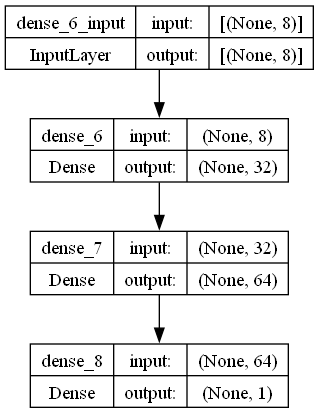

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import os

# Set the path to the Graphviz executables
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

# Save the models for interpretation (optional)
underfit_model.save('underfit_model.h5')
overfit_model.save('overfit_model.h5')
regularized_model.save('regularized_model.h5')

# Load the models for interpretation (optional)
loaded_underfit_model = load_model('underfit_model.h5')
loaded_overfit_model = load_model('overfit_model.h5')
loaded_regularized_model = load_model('regularized_model.h5')

# Plot the architecture of the loaded models directly in the Jupyter Notebook (without saving to files)
plot_model(loaded_underfit_model, show_shapes=True, show_layer_names=True)
plot_model(loaded_overfit_model, show_shapes=True, show_layer_names=True)
plot_model(loaded_regularized_model, show_shapes=True, show_layer_names=True)

## Step 15: Make Predictions

In [17]:
# Make predictions using the models
underfit_predictions = (underfit_model.predict(X_test_scaled) > 0.5).astype(int)
overfit_predictions = (overfit_model.predict(X_test_scaled) > 0.5).astype(int)
regularized_predictions = (regularized_model.predict(X_test_scaled) > 0.5).astype(int)

6/6 [==============================] - 0s 5ms/step


## Step 16: Visualize Results

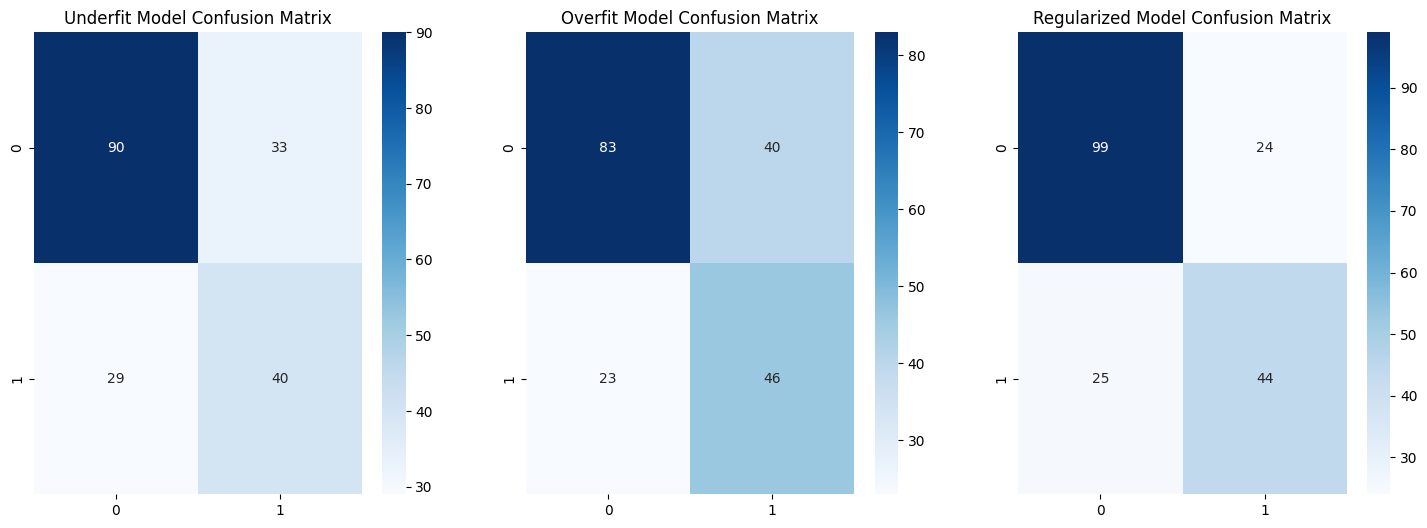

In [18]:
# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion matrix for the underfit model
sns.heatmap(confusion_matrix(y_test, underfit_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Underfit Model Confusion Matrix')

# Confusion matrix for the overfit model
sns.heatmap(confusion_matrix(y_test, overfit_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Overfit Model Confusion Matrix')

# Confusion matrix for the regularized model
sns.heatmap(confusion_matrix(y_test, regularized_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Regularized Model Confusion Matrix')

plt.show()

## Step 17: Interpret Confusion Matrices

In [19]:
# Interpret Confusion Matrices
def interpret_confusion_matrix(conf_matrix, model_name):
    tn, fp, fn, tp = conf_matrix.ravel()
    
    print(f"Confusion Matrix for {model_name}:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}\n")
    
    # Calculate rates from the confusion matrix
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(f"Precision for {model_name}: {precision:.4f}")
    print(f"Recall for {model_name}: {recall:.4f}")
    print(f"F1 Score for {model_name}: {f1:.4f}\n")

# Interpret Confusion Matrices for each model
interpret_confusion_matrix(confusion_matrix(y_test, underfit_predictions), "Underfit Model")
interpret_confusion_matrix(confusion_matrix(y_test, overfit_predictions), "Overfit Model")
interpret_confusion_matrix(confusion_matrix(y_test, regularized_predictions), "Regularized Model")

Confusion Matrix for Underfit Model:
True Negatives: 90
False Positives: 33
False Negatives: 29
True Positives: 40

Accuracy for Underfit Model: 0.6771
Precision for Underfit Model: 0.5479
Recall for Underfit Model: 0.5797
F1 Score for Underfit Model: 0.5634

Confusion Matrix for Overfit Model:
True Negatives: 83
False Positives: 40
False Negatives: 23
True Positives: 46

Accuracy for Overfit Model: 0.6719
Precision for Overfit Model: 0.5349
Recall for Overfit Model: 0.6667
F1 Score for Overfit Model: 0.5935

Confusion Matrix for Regularized Model:
True Negatives: 99
False Positives: 24
False Negatives: 25
True Positives: 44

Accuracy for Regularized Model: 0.7448
Precision for Regularized Model: 0.6471
Recall for Regularized Model: 0.6377
F1 Score for Regularized Model: 0.6423



## Step 18: Evaluate Additional Metrics

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate additional metrics for each model
def evaluate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}\n")

# Evaluate metrics for each model
evaluate_metrics(y_test, underfit_predictions, "Underfit Model")
evaluate_metrics(y_test, overfit_predictions, "Overfit Model")
evaluate_metrics(y_test, regularized_predictions, "Regularized Model")

Underfit Model Metrics:
Accuracy: 0.6771
Precision: 0.5479
Recall: 0.5797
F1 Score: 0.5634
AUC-ROC: 0.6557

Overfit Model Metrics:
Accuracy: 0.6719
Precision: 0.5349
Recall: 0.6667
F1 Score: 0.5935
AUC-ROC: 0.6707

Regularized Model Metrics:
Accuracy: 0.7448
Precision: 0.6471
Recall: 0.6377
F1 Score: 0.6423
AUC-ROC: 0.7213



## Step 19: Visualize ROC Curves

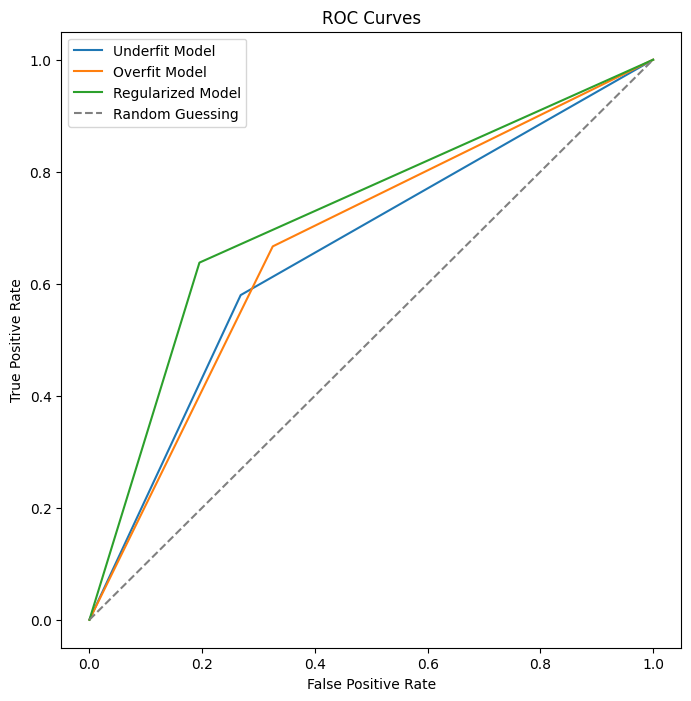

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot ROC curves for each model
fig, ax = plt.subplots(figsize=(8, 8))

# ROC curve for the underfit model
fpr, tpr, _ = roc_curve(y_test, underfit_predictions)
ax.plot(fpr, tpr, label='Underfit Model')

# ROC curve for the overfit model
fpr, tpr, _ = roc_curve(y_test, overfit_predictions)
ax.plot(fpr, tpr, label='Overfit Model')

# ROC curve for the regularized model
fpr, tpr, _ = roc_curve(y_test, regularized_predictions)
ax.plot(fpr, tpr, label='Regularized Model')

# Plot the random guessing curve
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()

plt.show()

## Step 20: Interpret ROC Curves

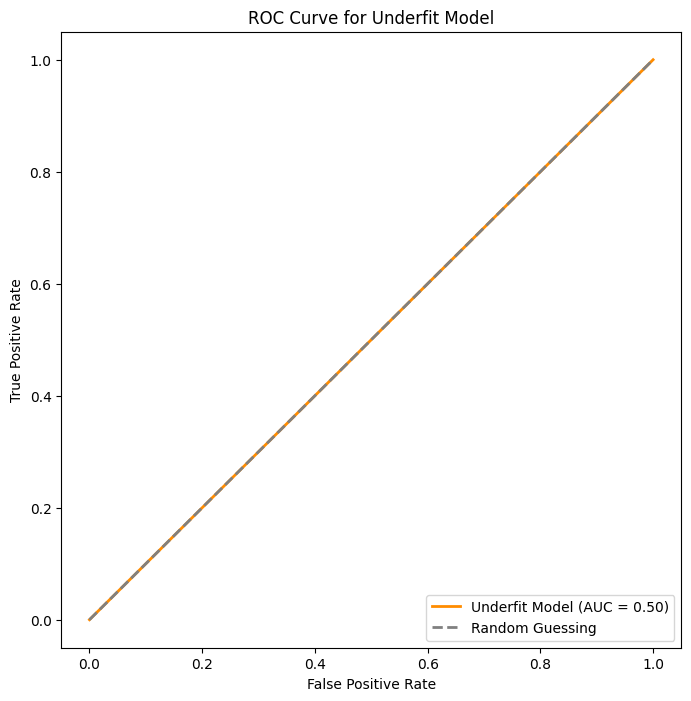

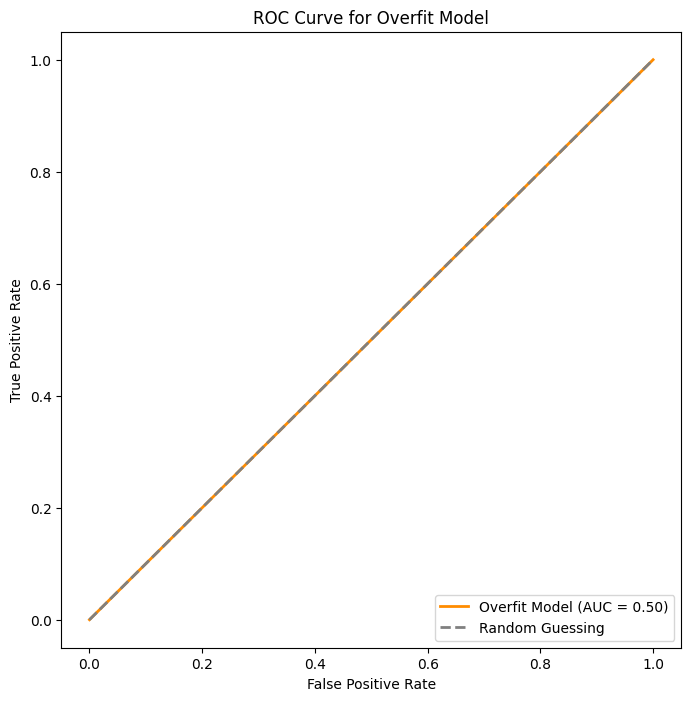

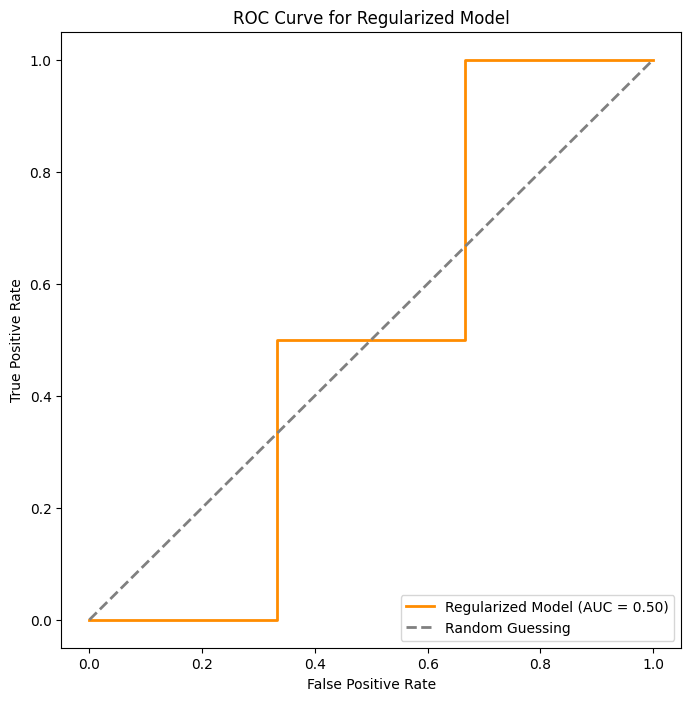

In [26]:
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Function to interpret ROC Curves
def interpret_roc_curve(y_true, y_pred_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


# Create dummy classifiers for underfitting, overfitting, and regularized models
underfit_model = DummyClassifier(strategy='constant', constant=1)
overfit_model = DummyClassifier(strategy='constant', constant=0)
regularized_model = LogisticRegression()

# Generate sample data
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 1, 0, 1, 0]

# Fit models to the data
underfit_model.fit(X, y)
overfit_model.fit(X, y)
regularized_model.fit(X, y)

# Predict probabilities using predict_proba
underfit_probs = underfit_model.predict_proba(X)[:, 1]
overfit_probs = overfit_model.predict_proba(X)[:, 1]
regularized_probs = regularized_model.predict_proba(X)[:, 1]

# Interpret ROC Curves for each model
interpret_roc_curve(y, underfit_probs, 'Underfit Model')
interpret_roc_curve(y, overfit_probs, 'Overfit Model')
interpret_roc_curve(y, regularized_probs, 'Regularized Model')

## Step 21: Model Interpretation and Saving

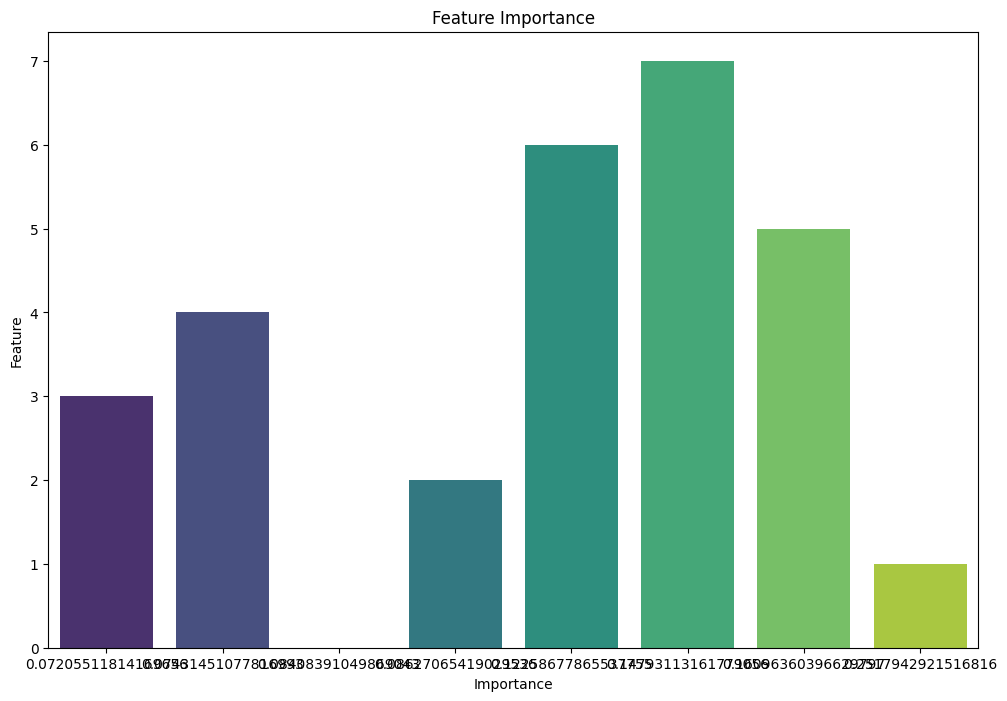

In [34]:
# Convert X_train_scaled to a DataFrame if it's a list
X_train_scaled_df = pd.DataFrame(X_train_scaled)

# Assuming X_train_scaled_df is a DataFrame
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled_df, y_train)

# Feature importances
feature_importances = pd.DataFrame({'Feature': X_train_scaled_df.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.show()

Save the Chosen Model

In [36]:
import joblib

# Save the model
joblib.dump(chosen_model, 'chosen_model.pkl')

# Optionally, save the feature scaling parameters (assuming 'scaler' is your scaler object)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']